# TABLE OF CONTENTS

* [Identify relevant directories and install](#IDENTIFY-DIRECTORIES-AND-INSTALL)
* [Imports](#IMPORTS)
* [Read forecasts](#READ-FORECASTS-FROM-COVID-HUB)
* [Scoreboard for Weekly Incidental cases](#BUILD-SCOREBOARD-FOR-INCIDENTAL-CASES)
* [Scoreboard for Cumulative Deaths](#BUILD-SCOREBOARD-FOR-CUMULATIVE-DEATHS)
* [Get weighted and unweighted ensemble forecasts](#Get-weighted-and-unweighted-model-forecasts)
    * [Unweighted](#UNWEIGHTED-FORECASTING)
    * [Weighted](#SCORE-WEIGHTED-FORECASTING)
* [Analysis of scores](#ANALYSIS-OF-SCORES)
    * [By date forecasts were made](#Plots-by-date-forecast-made)
    * [By target end date](#Plots-by-target-end-date)

# IDENTIFY DIRECTORIES AND INSTALL

In [1]:
#PLEASE CHANGE 'covidhubdir' TO YOUR OWN ???/???/???/covid19-forecast-hub/data-processed
from pathlib import Path
import os
covidhubdir = '/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed'
mypwd = !pwd
gitdir = str(Path(mypwd[0]).parent)
figuresdirectory = gitdir + '/' + 'Figures'

In [2]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


In [3]:
!pip install --upgrade -e .

Obtaining file:///home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


  Attempting uninstall: Scoreboard
    Found existing installation: Scoreboard 0.4
    Uninstalling Scoreboard-0.4:
      Successfully uninstalled Scoreboard-0.4
  Running setup.py develop for Scoreboard


In [4]:
os.chdir(mypwd[0])

In [5]:
!pwd

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Notebooks


# IMPORTS

In [6]:
import Scoreboard19 as S19
from tqdm import tqdm
import scipy.interpolate
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import shutil
import glob

# READ FORECASTS FROM COVID HUB

In [7]:
newPath = shutil.copy('../Rcode/read_processed_dataONY.R', 
                      covidhubdir)
os.chdir(covidhubdir)

In [8]:
rm *.csv

rm: cannot remove '*.csv': No such file or directory


In [9]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub


In [10]:
# !git fetch origin
# !git reset --hard origin/master
!git pull

Already up to date.


In [11]:
cd data-processed

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed


In [12]:
#Read forecasts in COVID-19 Forecast Hub - this step takes some time
!Rscript read_processed_dataONY.R


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [13]:
files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
for file in files:
    if os.path.isfile(file):
        shutil.copy2(file, mypwd[0])

In [14]:
os.chdir(mypwd[0])

files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
for file in files:
    if os.path.isfile(file):
        shutil.move(os.path.join(os.getcwd(), file), os.path.join(gitdir + '/' + 'Data/', file))        

os.chdir(gitdir + '/' + 'Data/')        
outfilename = 'all_dataONY.csv'
find = 0
        
with open(outfilename, 'wb') as outfile:
    for filename in glob.glob('*.osf'):
        find += 1
        if filename == outfilename:
            # don't want to copy the output into the output
            continue
        with open(filename, 'rb') as readfile:
            if find != 1:
                readfile.readline()  # Throw away header on all but first file
            shutil.copyfileobj(readfile, outfile)        
            
os.chdir(mypwd[0])            

# BUILD SCOREBOARD

## BUILD SCOREBOARD FOR INCIDENTAL CASES

NameError: name 'fig' is not defined

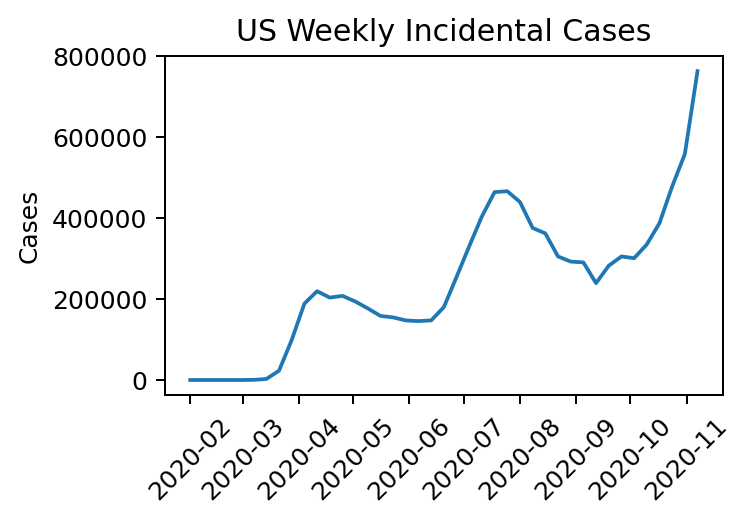

In [15]:
US_cases = S19.readobservedcases()
S19.plotUSIncCases(US_cases,figuresdirectory)

In [ ]:
FirstForecasts = S19.getscoreboard(US_cases,'Case','../Data/ScoreboardCases.pkl')

In [ ]:
S19.numberofteamsincovidhub(FirstForecasts,figuresdirectory)

In [ ]:
ScoreboardCases = pd.read_pickle('../Data/ScoreboardCases.pkl')
S19.plotdifferencescdfpdf(ScoreboardCases,'Case')
modeltypesCases = S19.getmodeltypes(ScoreboardCases)

In [ ]:
%%capture cap --no-stderr
themodels = ScoreboardCases['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [ ]:
#Writing out all the models in the scoreboard into a text file
with open('../INCCASE_Models.txt', 'w') as f:
    f.write(cap.stdout)

In [ ]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardCases[ScoreboardCases["proper"]==False].index
ScoreboardCases.drop(delete_row,inplace=True)

In [ ]:
S19.plotallscoresdist(ScoreboardCases,figuresdirectory,'Case')

In [ ]:
int(ScoreboardCases['deltaW'].max())

In [ ]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',1)

In [ ]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',4)

In [ ]:
#ScoreboardDeaths[ScoreboardDeaths['model']=='BPagano:RtDriven']

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'BPagano:RtDriven')

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'COVIDhub:ensemble')

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'COVIDhub:baseline')

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'CEID:Walk')

## BUILD SCOREBOARD FOR CUMULATIVE DEATHS

In [ ]:
US_deaths = S19.readobserveddeaths()
S19.plotUSCumDeaths(US_deaths,figuresdirectory)

In [ ]:
FirstForecasts = S19.getscoreboard(US_deaths,'Death','../Data/ScoreboardDeaths.pkl')

In [ ]:
S19.numberofteamsincovidhub(FirstForecasts,figuresdirectory)

In [ ]:
ScoreboardDeaths = pd.read_pickle('../Data/ScoreboardDeaths.pkl')
S19.plotdifferencescdfpdf(ScoreboardDeaths,'Death')
modeltypesDeaths = S19.getmodeltypes(ScoreboardDeaths)

In [ ]:
%%capture cap --no-stderr
themodels = ScoreboardDeaths['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [ ]:
#Writing out all the models in the scoreboard into a text file
with open('../CUMDEATH_Models.txt', 'w') as f:
    f.write(cap.stdout)

In [ ]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardDeaths[ScoreboardDeaths["proper"]==False].index
ScoreboardDeaths.drop(delete_row,inplace=True)

In [ ]:
S19.plotallscoresdist(ScoreboardDeaths,figuresdirectory,'Death')

In [ ]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',1)

In [ ]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',4)

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'BPagano:RtDriven')

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'COVIDhub:baseline')

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'COVIDhub:baseline')

# Get weighted and unweighted model forecasts

In [ ]:
ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-08-01','Cases',4,'weighted')
ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-08-01','Deaths',4,'weighted')
ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-08-01','Cases',4,'unweighted')
ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-08-01','Deaths',4,'unweighted')

# UNWEIGHTED FORECASTING

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'FDANIH:Sunweight')

In [ ]:
S19.plotlongitudinalUNWEIGHTED(US_deaths,ScoreboardDeaths,'Deaths',7)

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'FDANIH:Sunweight')

In [ ]:
S19.plotlongitudinalUNWEIGHTED(US_cases,ScoreboardCases,'Cases',7)

# SCORE-WEIGHTED FORECASTING

## Deaths

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'COVIDhub:ensemble')
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'FDANIH:Sweight')

## Cases

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'COVIDhub:ensemble')
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'FDANIH:Sweight')

# ANALYSIS OF SCORES

## Plots by date forecast made

In [ ]:
S19.plotgroupsFD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 1, 'Death')

In [ ]:
S19.plotgroupsFD(ScoreboardCases, modeltypesCases, figuresdirectory, 1, 'Case')

## Plots by target end date

In [ ]:
S19.plotgroupsTD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 'Death')

In [ ]:
S19.plotgroupsTD(ScoreboardCases, modeltypesCases, figuresdirectory, 'Case')

### ADD TO GITHUB

In [ ]:
os.chdir(gitdir)
# #!git remote set-url origin https://github.com/ONYLAB/Scoreboard.git
# #!git config credential.helper store
#!git stash
#!git pull --rebase origin master
!git add --all
!git commit -am “Update”
!git push -u origin master
os.chdir(mypwd[0])